Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube

Importing the CSV

In [2]:
df = pd.read_csv('C:/Users/Naf_Second/Downloads/search-history.csv')

In [3]:
df.head(15)

,title,titleUrl,time
0,Searched for Rain falling on tin roof ⛈️ for S...,https://www.youtube.com/results?search_query=R...,2023-09-30T03:47:27.661Z
1,Searched for rain falling on tin roof,https://www.youtube.com/results?search_query=r...,2023-09-30T03:45:49.189Z
2,Searched for 1 hour long rain video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:24.237Z
3,Searched for 1 hour long video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:17.836Z
4,Watched ADV2_PEDESTAL:6137505332662642089,https://www.youtube.com/watch?v=wVWfih1-pZM,2023-09-29T22:35:41.547Z
5,Searched for beautiful soup,https://www.youtube.com/results?search_query=b...,2023-09-29T09:00:51.924Z
6,Searched for julie and ellis from,https://www.youtube.com/results?search_query=j...,2023-09-29T07:47:58.721Z
7,Searched for php tutorial,https://www.youtube.com/results?search_query=p...,2023-09-29T07:23:38.315Z
8,Searched for nltk,https://www.youtube.com/results?search_query=nltk,2023-09-29T07:01:15.270Z
9,Searched for beautiful soup,https://www.youtube.com/results?search_query=b...,2023-09-29T07:00:54.535Z


In [4]:
print(df.shape)

(3743, 3)


Cleaning the Data

In [5]:
df = df.rename(columns={'title': 'Title'})
df = df.rename(columns={'titleUrl': 'Youtube Link'})
df = df.rename(columns={'time': 'Time'})
print(df.shape)

(3743, 3)


In [6]:
df.head()

,Title,Youtube Link,Time
0,Searched for Rain falling on tin roof ⛈️ for S...,https://www.youtube.com/results?search_query=R...,2023-09-30T03:47:27.661Z
1,Searched for rain falling on tin roof,https://www.youtube.com/results?search_query=r...,2023-09-30T03:45:49.189Z
2,Searched for 1 hour long rain video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:24.237Z
3,Searched for 1 hour long video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:17.836Z
4,Watched ADV2_PEDESTAL:6137505332662642089,https://www.youtube.com/watch?v=wVWfih1-pZM,2023-09-29T22:35:41.547Z


In [7]:
idx = 0
for name in df['Title']:
    if "Watched" in name or "Visited" in name:
        df = df.drop(idx)
    idx+=1

In [16]:
df = df.dropna()
print(df.shape)

(3170, 5)


In [9]:
df['Time of Searching in hours'] = None
df['Time of Searching in minutes'] = None

In [10]:
hoursarray = []
minutesarray = []
idx = 0
for time in df['Time']:
    hours = ''
    minutes = '' 
    hours += time[11]
    hours += time[12]
    minutes += time[14]
    minutes += time[15]
    hours = int(hours)
    minutes = int(minutes)
    hoursarray.append(hours)
    minutesarray.append(minutes)
    df.loc[idx, 'Time of Searching in hours'] = hours
    df.loc[idx, 'Time of Searching in minutes'] = minutes
    idx+=1
df.head(15)

,Title,Youtube Link,Time,Time of Searching in hours,Time of Searching in minutes
0,Searched for Rain falling on tin roof ⛈️ for S...,https://www.youtube.com/results?search_query=R...,2023-09-30T03:47:27.661Z,3,47
1,Searched for rain falling on tin roof,https://www.youtube.com/results?search_query=r...,2023-09-30T03:45:49.189Z,3,45
2,Searched for 1 hour long rain video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:24.237Z,3,16
3,Searched for 1 hour long video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:17.836Z,3,16
5,Searched for beautiful soup,https://www.youtube.com/results?search_query=b...,2023-09-29T09:00:51.924Z,7,47
6,Searched for julie and ellis from,https://www.youtube.com/results?search_query=j...,2023-09-29T07:47:58.721Z,7,23
7,Searched for php tutorial,https://www.youtube.com/results?search_query=p...,2023-09-29T07:23:38.315Z,7,1
8,Searched for nltk,https://www.youtube.com/results?search_query=nltk,2023-09-29T07:01:15.270Z,7,0
9,Searched for beautiful soup,https://www.youtube.com/results?search_query=b...,2023-09-29T07:00:54.535Z,6,59
10,Searched for data analysis on youtube history,https://www.youtube.com/results?search_query=d...,2023-09-29T06:59:20.596Z,6,58


Minute when most frequently searched:

In [58]:
df.dropna()
fy = df['Time of Searching in minutes'].mean()
print(f'Most frequent minute: {round(fy)}th')

Most frequent minute: 30th


Sorting the dataframe based on "Time" column for better visual

In [17]:
df = df.sort_values(by=['Time'], ascending=[True])
df.head(15)


,Title,Youtube Link,Time,Time of Searching in hours,Time of Searching in minutes
3455,Searched for aadat fingerstyle,https://www.youtube.com/results?search_query=a...,2021-11-27T05:30:38.098Z,5,16
3454,Searched for Kina - can we kiss forever? - Fin...,https://www.youtube.com/results?search_query=K...,2021-11-27T06:55:47.876Z,9,34
3453,Searched for twerking in park tiktok,https://www.youtube.com/results?search_query=t...,2021-11-27T11:11:56.646Z,19,48
3452,Searched for stereo hearts guitar fingerstyle,https://www.youtube.com/results?search_query=s...,2021-11-27T17:25:19.495Z,5,31
3451,Searched for tamak pata fingerstyle,https://www.youtube.com/results?search_query=t...,2021-11-27T17:27:12.808Z,8,14
...,...,...,...,...,...
5,Searched for beautiful soup,https://www.youtube.com/results?search_query=b...,2023-09-29T09:00:51.924Z,7,47
3,Searched for 1 hour long video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:17.836Z,3,16
2,Searched for 1 hour long rain video,https://www.youtube.com/results?search_query=1...,2023-09-30T03:16:24.237Z,3,16
1,Searched for rain falling on tin roof,https://www.youtube.com/results?search_query=r...,2023-09-30T03:45:49.189Z,3,45


In [18]:
df.shape

(3170, 5)

In [53]:
frequency = {}

for hour in df['Time of Searching in hours']:
    if hour in frequency:
        frequency[hour] += 1
    else:
        frequency[hour] = 1

frequency = dict(sorted(frequency.items()))
for hour, count in frequency.items():
    print(f"Hour {hour}: {count} times")



Hour 0: 61 times
Hour 1: 139 times
Hour 2: 198 times
Hour 3: 218 times
Hour 4: 165 times
Hour 5: 132 times
Hour 6: 139 times
Hour 7: 170 times
Hour 8: 158 times
Hour 9: 149 times
Hour 10: 193 times
Hour 11: 173 times
Hour 12: 96 times
Hour 13: 57 times
Hour 14: 59 times
Hour 15: 60 times
Hour 16: 88 times
Hour 17: 139 times
Hour 18: 157 times
Hour 19: 131 times
Hour 20: 139 times
Hour 21: 172 times
Hour 22: 119 times
Hour 23: 58 times


Visualizing the occurence 

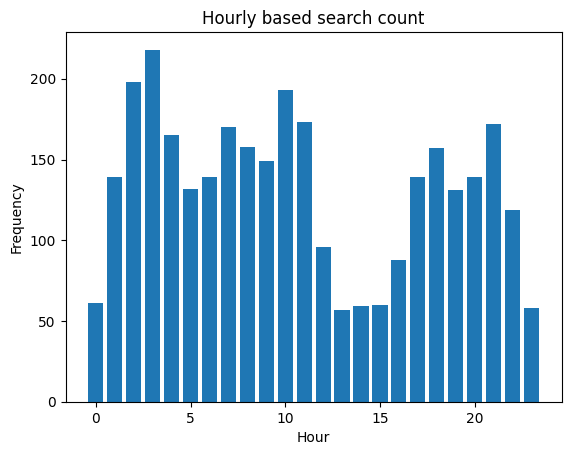

In [57]:
hour = list(frequency.keys())
values = list(frequency.values())

plt.bar(hour, values)


plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Hourly based search count")

plt.show()


From the whole analysis it can be predicted that, in the 30th minute of the 3rd hour is when most frequent searches occurred.